# Support Vector Machines

## Abstract/Summary

Given two datasets with 2 real number variables and 1 binary classification `DS2` and `DS3`, I will perform the following tasks:

### `DS1`
1. Design a new dataset `DS1` with at least 50 points, for which the selection of the complexity parameter C in a linear SVM makes a difference.

2. Load the data set `DS1`, train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

3. Carry out a leave-1-out cross-validation with an SVM on the dataset. Report the performance on training and test set.

4. Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.

5. Discuss what C does and how it improved the SVM in this case.


### `DS2`
1. Repeat step 1.2 and 1.3 with `DS2`, justifying any change to the cross validation technique or number of folds.

2. Pick a kernel which will improve the SVM, plot the data set and resulting decision boundary, give the performance.

3. Discuss which kernel was chosen and why.


### `DS3`
1. Repeat step 1.2 and 1.3 with `DS3`, again justifying any change to the cross validation technique or number of folds.

2. Pick a kernel and 2 parameters and optimize, optimize the parameters, plot again the data set and decision boundary, and give the performance.

3. Discuss the results of the previous step.

## Implementation/Analysis

### `DS1`
1. Design a new dataset `DS1` with at least 50 points, for which the selection of the complexity parameter C in a linear SVM makes a difference.

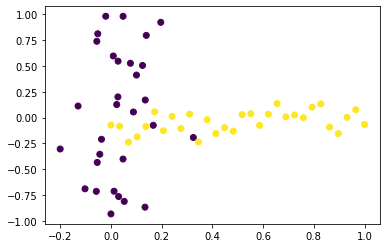

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs

# generate reproducible dataset
np.random.seed(12345)
N_SAMPLES = 60

# vertical cluster (dark, class 0)
x1 = np.random.normal(scale=0.1, size=30)
y1 = x1-np.linspace(-1, 1, 30)

# horizontal cluster (light, class 1)
x2 = np.linspace(0, 1, 30)
y2 = np.random.normal(scale=0.1, size=30)

# combine classes into one dataset
X = np.stack([np.concatenate([x1,x2]), np.concatenate([y1,y2])]).T
y = np.array([0 for x in x1] + [1 for x in x2])

# plot data
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

# save to csv file
DS_array = np.column_stack([X.round(6), y])
DS = pd.DataFrame(DS_array).astype({2:'int'})
DS.to_csv('D1.csv', header=None, index=None)

2. Load the data set `DS1`, train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

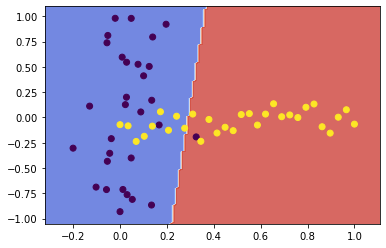

In [2]:
from sklearn.svm import SVC


# fit, plot, and return SVM with specified kw parameters
def fit_and_plot(X, y, **kwargs):
    # create an x,y mesh to predict and plot
    x_min, y_min = X.iloc[:,0:2].min()
    x_max, y_max = X.iloc[:,0:2].max()
    grain = (x_max - x_min) / 100
    margin = grain * 10
    xx, yy = np.meshgrid(np.arange(x_min-margin, x_max+margin, grain),
                         np.arange(y_min-margin, y_max+margin, grain))
    
    # fit linear SVM classifier and predict z
    svc = SVC(**kwargs).fit(X, y)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = Z.reshape(xx.shape)

    # scatter plot and decision boundary
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x=X.iloc[:,0], y=X.iloc[:,1], c=y)
    plt.show()
    
    return svc


# load custom dataset from save file
DS1 = pd.read_csv('D1.csv', header=None)
X1 = DS1.iloc[:, 0:2]
y1 = DS1.iloc[:, 2]
N_SAMPLES1 = DS1.shape[0]

svc1 = fit_and_plot(X1, y1, kernel='linear')

3. Carry out a leave-1-out cross-validation with an SVM on the dataset. Report the performance on training and test set.

In [3]:
from sklearn.model_selection import LeaveOneOut, cross_validate

# pretty-print scores from a cross-validation instance
def print_scores(cv):
    # print both training and test scores
    for score in ['train_score', 'test_score']:
        u, c = np.unique(cv[score], return_counts=True)
        u = u.round(3)
        di = dict(zip(u, c)).items()
        n = sum([v for k,v in di])
        
        # show unique scores and n times those scores were achieved
        print('CV ', score, 's: ', 
              ', '.join(['*'.join([str(k),str(v)]) for k,v in di]), 
              sep='')
        
        # show weighted mean of scores
        print('Mean CV', score, 
              round(sum([k*v for k,v in di])/n, 5), '\n')

        
# print scores of linear SVM with default C
loo = LeaveOneOut()
cv1 = cross_validate(svc1, X1, y1, cv=loo.split(X1, y1), 
                     return_train_score=True)
print_scores(cv1)

CV train_scores: 0.814*3, 0.831*47, 0.847*10
Mean CV train_score 0.83282 

CV test_scores: 0.0*11, 1.0*49
Mean CV test_score 0.81667 



4. Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.

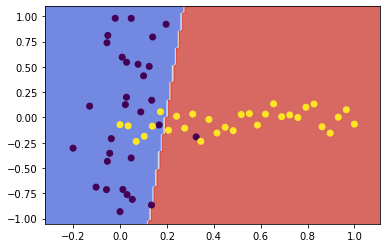

CV train_scores: 0.864*9, 0.881*47, 0.898*4
Mean CV train_score 0.87958 

CV test_scores: 0.0*8, 1.0*52
Mean CV test_score 0.86667 



In [4]:
# fit, plot and print scores of linear SVM with increased C
svc1 = fit_and_plot(X1, y1, kernel='linear', C=1000)
cv1 = cross_validate(svc1, X1, y1, cv=loo.split(X1, y1), 
                     return_train_score=True)
print_scores(cv1)

5. Discuss what C does and how it improved the SVM in this case.

The complexity parameter C tunes the trade-off between hyperplane margin width and training error. A higher value for C penalises more heavily on misclassified points which are far from their correct margin boundary, thus encouraging a tighter fit to the training data. Likewise, a lower C penalises the same points lightly, giving the model less complexity and a decision boundary less biased to the training data.

In this case, increasing C further penalised the misclassification of those few points near the decision boundary. By penalising those misclassifications, the SVM algorithm chose a boundary which was more closely fit to the data.

### `DS2`
1. Repeat step 1.2 and 1.3 with `DS2`, justifying any change to the cross validation technique or number of folds.

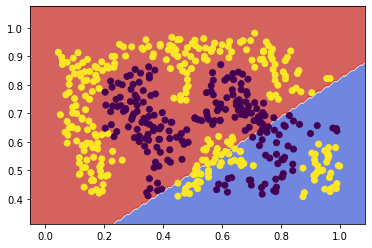

In [5]:
# load provided dataset from save file
DS2 = pd.read_csv('D2.csv', header=None)
X2 = DS2.iloc[:, 0:2]
y2 = DS2.iloc[:, 2]
N_SAMPLES2 = DS2.shape[0]

# C=10^6 to enable linear SVM to find a sufficient decision boundary
svc2linear = fit_and_plot(X2, y2, kernel='linear', C=10**6)

The linear kernel was not able to select a decision boundary for this data with any lower complexity parameters attempted. But with a complexity parameter so high, conducting a full Leave-One-Out cross-validation became too computationally expensive, so I am switching here to a 5-fold cross-validation.

In [6]:
from sklearn.model_selection import KFold

# print training and test scores from CV
kf = KFold(n_splits=5)
cv2 = cross_validate(svc2linear, X2, y2, cv=kf.split(X2, y2), 
                     return_train_score=True)
print_scores(cv2)

CV train_scores: 0.55*1, 0.555*1, 0.568*1, 0.582*1, 0.59*1
Mean CV train_score 0.569 

CV test_scores: 0.44*1, 0.49*1, 0.51*1, 0.54*2
Mean CV test_score 0.504 



2. Pick a kernel which will improve the SVM, plot the data set and resulting decision boundary, give the performance.

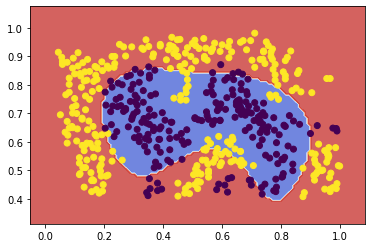

CV train_scores: 0.847*4, 0.864*4, 0.881*35, 0.898*12, 0.915*5
Mean CV train_score 0.88383 

CV test_scores: 0.0*12, 1.0*48
Mean CV test_score 0.8 



In [7]:
# fit, plot and print cv scores of SVM with RBF kernel
svc2rbf = fit_and_plot(X2, y2, kernel='rbf')
cv2 = cross_validate(svc2rbf, X2, y2, cv=loo.split(X, y), 
                     return_train_score=True)
print_scores(cv2)

3. Discuss which kernel was chosen and why.

I chose to use the Radial Basis kernel, because it is the latest-and-greatest standard kernel for non-linear tasks. This dataset is clearly one that requires nonlinear separation, which would be more difficult or impossible to achieve with polynomial or other kernels. RBF was able to efficiently find a reasonable decision boundary, even without tuning other hyperparameters like C.

### `DS3`
1. Repeat step 1.2 and 1.3 with `DS3`, again justifying any change to the cross validation technique or number of folds.

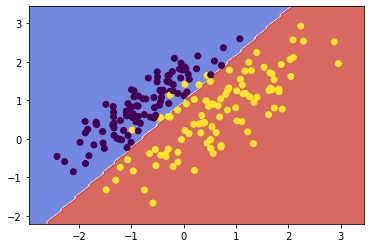

In [8]:
# load provided dataset from save file
DS3 = pd.read_csv('D3.csv', header=None)
X3 = DS3.iloc[:, 0:2]
y3 = DS3.iloc[:, 2]
N_SAMPLES3 = DS3.shape[0]

svc3 = fit_and_plot(X3, y3, kernel='linear')

This dataset is linearly separable without a high complexity parameter, so I am reverting back to leave-one-out CV to maximise insight into the model's performance.

In [9]:
cv3 = cross_validate(svc3, X3, y3, cv=loo.split(X1, y1), 
                     return_train_score=True)
print_scores(cv3)

CV train_scores: 0.898*54, 0.915*6
Mean CV train_score 0.8997 

CV test_scores: 0.0*6, 1.0*54
Mean CV test_score 0.9 



2. Pick a kernel and 2 parameters and optimize, optimize the parameters, plot again the data set and decision boundary, and give the performance.

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


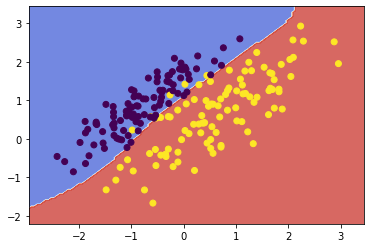

{'C': 10,
 'coef0': -3.4210526315789473,
 'gamma': 0.47368421052631576,
 'kernel': 'sigmoid'}

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['sigmoid'],
          'gamma': np.linspace(0, 1, 20),
          'coef0': np.linspace(-5, 5, 20),
          'C': [10**x for x in [-2,-1,1,2]]}

grid_search = GridSearchCV(SVC(), params, n_jobs=2).fit(X3,y3)
svc3sig = fit_and_plot(X3, y3, **grid_search.best_params_)
grid_search.best_params_

In [11]:
cv3sig = cross_validate(svc3sig, X3, y3, cv=loo.split(X3, y3), 
                        return_train_score=True)
print_scores(cv3sig)

CV train_scores: 0.915*3, 0.95*2, 0.955*2, 0.96*129, 0.965*60, 0.97*4
Mean CV train_score 0.96087 

CV test_scores: 0.0*9, 1.0*191
Mean CV test_score 0.955 



3. Discuss the results of the previous step.

I chose the sigmoid kernel due to the near-linear separation between the two classes of this dataset. By tuning the `gamma` and `coef0` parameters of the sigmoid kernel, the near-linear decision boundary was able to squiggle into the small gaps between the two classes and improve the accuracy of the model. 

However, even with the improvement in test accuracy, I would actually prefer to keep the linear model. The linear separation between classes is quite clear, and there was no difference between training and test accuracy of the linear model. With so few observations in the dataset, the accuracy improvement of the sigmoid model is likely to just be the result of overfit to noise. I think the linear model describes the data better, and would likely end up performing better on future data.